# Практика

## Определение вероятности. События

Требуется сгенерировать необходимые выборки и произвести по ним расчеты

In [15]:
import pandas as pd
import numpy as np
import itertools
import random
from random import seed, randint
import scipy.stats as sts
from scipy.stats import bernoulli

import seaborn as sns
import matplotlib.pyplot as plt

N = 90000 #размер выборки для повторений

### Задача 1
Брошено две монеты. Найти вероятность того, что монеты выпали разными сторонами

In [2]:
coin_1 = np.random.randint(0, 2, size=N)
coin_2 = np.random.randint(0, 2, size=N)

cases = pd.DataFrame(zip(coin_1, coin_2), columns=['Coin1', 'Coin2'])
p = cases[cases['Coin1']!=cases['Coin2']].shape[0] / N
print('Вероятность того, что монеты выпали разными сторонами - ', p)

Вероятность того, что монеты выпали разными сторонами -  0.4992888888888889


### Задача 2
Брошено три монеты. Описать множество всех элементарных событий. Найти вероятности следующих событий:


1.   A = {не выпало ни одного герба}
2.   B = {выпало четное число гербов}
3.   C = {на третьей монете выпал герб}


In [3]:
coin_1 = np.random.randint(0, 2, size=N)
coin_2 = np.random.randint(0, 2, size=N)
coin_3 = np.random.randint(0, 2, size=N)

cases = pd.DataFrame(zip(coin_1, coin_2, coin_3), columns=['Coin1', 'Coin2', 'Coin3'])

a = cases[(cases['Coin1']!=0) & (cases['Coin2']!=0) & (cases['Coin3']!=0)].shape[0] / N
b = cases[cases['Coin1'] + cases['Coin2'] + cases['Coin3'] == 2].shape[0] / N
c = cases[cases['Coin3'] == 0].shape[0] / N
print('Вероятность А - ', a)
print('Вероятность B - ', b)
print('Вероятность C - ', c)

Вероятность А -  0.12241111111111111
Вероятность B -  0.37614444444444445
Вероятность C -  0.5014111111111111


Предлагается также решить задачи: 

### Задача 3
Из двух претендентов E и L на ответственную должность три члена комиссии должны отобрать одного. Каждый член комиссии должен указать либо одного достойного, либо забраковать обоих. Претендент считается выбранным, если он был признана достойным хотя бы двумя членами комиссии.
Найти вероятность событий:

A = {рекомендован L}, B = {рекомендован E}


In [4]:
letters = ['E', 'L', 'O']

vote_1 = np.random.choice(letters, size=N)
vote_2 = np.random.choice(letters, size=N)
vote_3 = np.random.choice(letters, size=N)

votes = pd.DataFrame(zip(vote_1, vote_2, vote_3), columns=['vote1', 'vote2', 'vote3'])

votes['E_sum'] = votes.loc[:, :'vote3'].eq('E').sum(axis=1)
votes['L_sum'] = votes.loc[:, :'vote3'].eq('L').sum(axis=1)

A = votes[votes['E_sum'] >= 2].shape[0] / N
B = votes[votes['L_sum'] >= 2].shape[0] / N
print('Вероятность А - ', A)
print('Вероятность B - ', B)

Вероятность А -  0.2594
Вероятность B -  0.26064444444444446


### Задача 4
Брошено две игральных кости. Описать множество элементарных событий. Найти вероятности событий:

A = {вышло две "шестерки"}

B = {сумма выпавших очков не меньше 11}

C = {не выпала ни одна "шестерка"}

In [5]:
dice_1 = np.random.randint(1, 7, size=N)
dice_2 = np.random.randint(1, 7, size=N)

rolls = pd.DataFrame(zip(dice_1, dice_2), columns=['dice1', 'dice2'])

a = rolls[(rolls['dice1']== 6) & (rolls['dice2']== 6) ].shape[0] / N
b = rolls[(rolls['dice1'] + rolls['dice2'] >= 11) ].shape[0] / N
c = rolls[(rolls['dice1']!= 6) & (rolls['dice2']!= 6) ].shape[0] / N
print('Вероятность А - ', a)
print('Вероятность B - ', b)
print('Вероятность C - ', c)



Вероятность А -  0.027444444444444445
Вероятность B -  0.08353333333333333
Вероятность C -  0.6953444444444444


## Вероятность суммы событий

### Задача 5
Брошены две игральные кости. Найти вероятность события D = {выпала хотя бы одна шестёрка}


In [6]:
dice_1 = np.random.randint(1, 7, size=N)
dice_2 = np.random.randint(1, 7, size=N)

rolls = pd.DataFrame(zip(dice_1, dice_2), columns=['dice1', 'dice2'])

d = rolls[(rolls['dice1']== 6) | (rolls['dice2']== 6) ].shape[0] / N

print('Вероятность D - ', d)

Вероятность D -  0.3066111111111111


Предлагается также решить задачи: 

### Задача 6
В телефонном номере три последние цифры стерлись. Считая, что все возможные значения стершихся цифр равновероятны, найти вероятность событий:

A = {Стерлись различные цифры},

B = {Стерлись одинаковые цифры},

C = {Среди стершихся цифр хотя бы две совпадают},

D = {Среди стершихся цифр хотя бы две различны}


In [7]:
num_1 = np.random.randint(0, 10, size=N)
num_2 = np.random.randint(0, 10, size=N)
num_3 = np.random.randint(0, 10, size=N)

nums = pd.DataFrame(zip(num_1, num_2,num_3), columns=['num1', 'num2', 'num3'])

a = nums[ (nums['num1'] != nums['num2']) & (
           nums['num1'] != nums['num3']) & (
           nums['num2'] != nums['num3']) ].shape[0] / N

b = nums[ (nums['num1'] == nums['num2']) & (
           nums['num1'] == nums['num3']) & (
           nums['num2'] == nums['num3']) ].shape[0] / N

c = nums[ (nums['num1'] == nums['num2']) | (
           nums['num1'] == nums['num3']) | (
           nums['num2'] == nums['num3']) ].shape[0] / N

d = nums[ (nums['num1'] != nums['num2']) | (
           nums['num1'] != nums['num3']) | (
           nums['num2'] != nums['num3']) ].shape[0] / N

print('Вероятность A - ', a)
print('Вероятность B - ', b)
print('Вероятность C - ', c)
print('Вероятность D - ', d)

Вероятность A -  0.7201666666666666
Вероятность B -  0.010377777777777777
Вероятность C -  0.2798333333333333
Вероятность D -  0.9896222222222222


## Случайные величины

### Задача 7
В лотерее имеется 10 билетов, из которых один выигрышный. Размер выигрыша 10 ден. ед.; стоимость билета 1 ден ед. Найти закон распределения случайной величины X, равной чистому выигрышу участника лотереи, который вытаскивает билет первым.

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

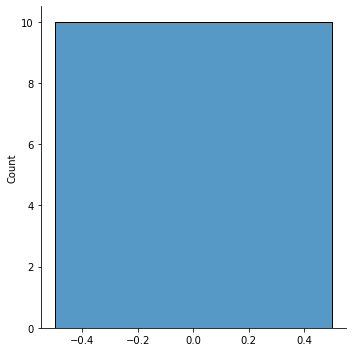

In [8]:
bernoulli_rv = sts.bernoulli(0.1) 
bernoulli_rv.rvs(10)

data = bernoulli.rvs(size = 10 , p = 0.1)

sns.displot(data, discrete=True)
data

Предлагается также решить задачу: 

### Задача 8
Брошены две игральные кости. Найти закон распределения случайной величины $X$, равной сумме выпавших очков. Найти вероятности событий ${X <= 4}$, ${X > 4}$

In [24]:
df = sorted(itertools.product(['1', '2', '3', '4', '5', '6'], repeat=2))
scores = []
for i in df:
    score = int(i[0]) + int(i[1])
    scores.append(score)
summs = set(sorted(scores))

p={}
for i in summs:
    a = {j for j in df if int(j[0]) + int(j[1]) == i}
    p[i] = len(a) / len(df)

p = pd.DataFrame(list(p.items()),
                   columns=['sum', 'prob'])
p1 = p[p['sum']<=4]['prob'].sum()
p2 = p[p['sum']>4]['prob'].sum()
print('Вероятность событий  𝑋<=4:', p1)
print('Вероятность событий  𝑋>4:', p2)

Вероятность событий  𝑋<=4: 0.16666666666666666
Вероятность событий  𝑋>4: 0.8333333333333333


## Условные вероятности

### Задача 9
Из колоды (36 карт) вынимают последовательно без возвращения две карты. Найти вероятность того, что первой картой была шестерка, а второй — семерка. Найти условную вероятность того же события при условии, что обе карты бубновой масти.


In [30]:
A = (4/36) * (4/35)
print ('вероятность того, что первой картой была шестерка, а второй — семерка', A)

B = (1/36) * (1/35)
print ('вероятность того, что первой картой была бубновая шестерка, а второй — бубновая семерка', B)

вероятность того, что первой картой была шестерка, а второй — семерка 0.012698412698412697
вероятность того, что первой картой была бубновая шестерка, а второй — бубновая семерка 0.0007936507936507935


Предлагается также решить задачу: 

### Задача 10
Из урны, содержащей два белых и три черных шара, последовательно извлекают два шара; вынутые шары не возвращаются. Если первый шар оказался черным, то перед вторым извлечением в урну добавляют белый шар. В противном случае состав оставшихся шаров не меняют. Найти вероятности событий:

$A$ = {извлечены два белых шара},

$B$ = {извлечены два черных шара}

Указание. Пусть событие $C_1$ = {первый шар белый}, событие $C_2$ = {второй шар белый}. Тогда $A = C_1C_2$, $B = \overline C_1 \overline C_2$ 

In [39]:
black = 3
white = 2

ball1, ball2 = [], []
for i in range(N):
    BW = ['black' for b in range(black)] + ['white' for w in range(white)]
    first_ball = np.random.choice(BW)
    BW.remove(first_ball)
    if first_ball == 'black':
        BW.append('white')
        ball1.append(first_ball)
    elif first_ball == 'white':
        ball1.append(first_ball)
    second_ball = np.random.choice(BW)
    ball2.append(second_ball)
    
df = pd.DataFrame(zip(ball1, ball2), columns=['ball1', 'ball2'])

pA = df[(df['ball1'] == 'white') & (df['ball2'] == 'white')].shape[0] / N
pB = df[(df['ball1'] == 'black') & (df['ball2'] == 'black')].shape[0] / N

print('Вероятность А - ', pA)
print('Вероятность B - ', pB)

Вероятность А -  0.10067
Вероятность B -  0.2385
